In [12]:
import sys
sys.path.append("/Users/sahilhegde/Documents/Spring 2021/phd-code")

import phd
import numpy as np

import h5py

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from sklearn.linear_model import LinearRegression
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "STIXGeneral"
mpl.rcParams["xtick.labelsize"] = 16
mpl.rcParams["ytick.labelsize"] = 16

In [3]:
def create_particles(gamma, nx=10):

    Lx = 1.    # domain size in x
    dx = Lx/nx # spacing between particles
    n = nx*nx  # number of points

    rho0 = 1.0
    vel0 = 0.0
    pre0 = 1.0

    A = 1.0e-6
    w = 2*np.pi
    k = 2*np.pi

    # create particle container
    particles = phd.HydroParticleCreator(n)

    particles["density"][:] = rho0
    particles["velocity-x"][:] = vel0
    particles["velocity-y"][:] = 0.0
    particles["pressure"][:] = pre0/gamma

    part = 0
    for i in range(nx):
        for j in range(nx):
            x = (i+0.5)*dx; y = (j+0.5)*dx

            particles["density"][part] += A*np.sin(k*x)
            particles["velocity-x"][part] += (w/k)*A/rho0*np.sin(k*x)
            particles["pressure"][part] += (w/k)**2*A*np.sin(k*x)

            particles["position-x"][part] = x
            particles["position-y"][part] = y
            particles["ids"][part] = part
            part += 1

    return particles

In [4]:
for i in [10, 20, 40, 80, 160]:

    gamma = 5./3.
    particles = create_particles(gamma, nx=i)

    # computation related to boundaries
    domain_manager = phd.DomainManager(
            xmin=[0., 0.], xmax=[1., 1.], initial_radius=0.1)

    # create voronoi mesh
    mesh = phd.Mesh(regularize=False)

    # computation
    integrator = phd.MovingMeshMUSCLHancock()
    integrator.set_mesh(mesh)
    integrator.set_riemann(phd.HLLC())
    integrator.set_particles(particles)
    integrator.set_domain_manager(domain_manager)
    integrator.set_boundary_condition(phd.Periodic())
    integrator.set_reconstruction(phd.PieceWiseLinear(gizmo_limiter=False))
    integrator.set_equation_state(phd.IdealGas(gamma=gamma))

    # add finish criteria
    simulation_time_manager = phd.SimulationTimeManager()
    simulation_time_manager.add_finish(phd.Time(time_max=1.0))

    # output last step
    output = phd.FinalOutput()
    output.set_writer(phd.Hdf5())
    simulation_time_manager.add_output(output)

    # output initial data 
    output = phd.InitialOutput()
    output.set_writer(phd.Hdf5())
    simulation_time_manager.add_output(output)

    # Create simulator
    simulation = phd.Simulation(simulation_name="linear_wave_"+str(i), colored_logs=True)
    simulation.set_integrator(integrator)
    simulation.set_simulation_time_manager(simulation_time_manager)
    simulation.initialize()
    simulation.solve()

phd: [INFO     ] 2021-02-25 11:33:20,540: 

 __________.__         .___
\______   \  |__    __| _/
 |     ___/  |  \  / __ |
 |    |   |   Y  \/ /_/ |
 |____|   |___|  /\____ |
               \/      \/
Welcome to Python Hydro-Dynamics!

Simulation Information
------------------------------
Running in serial
Log file saved at: linear_wave_10.log
Problem solving: linear_wave_10
Output data will be saved at: linear_wave_10_output

Classes used in the simulation
------------------------------
boundary_condition: Periodic
domain_manager: DomainManager
equation_state: IdealGas
integrator: MovingMeshMUSCLHancock
mesh: Mesh
particles: CarrayContainer
reconstruction: PieceWiseLinear
riemann: HLLC

phd: [INFO     ] 2021-02-25 11:33:20,541: IntegrateBase: Building initial mesh
phd: [INFO     ] 2021-02-25 11:33:20,542: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,551: hdf5 format: Writting initial_output0000.hdf5
phd: [INFO     ] 2021-02-25 11:33:20,583: Beginning integration

phd: [INFO     ] 2021-02-25 11:33:20,642: Hydro dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,642: Starting iteration: 10 time: 0.282095 dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,643: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:20,643: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:20,644: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,645: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,645: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:20,645: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,647: Hydro dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,648: Starting iteration: 11 time: 0.310304 dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,648: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:20,648: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-0

phd: [INFO     ] 2021-02-25 11:33:20,704: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,704: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,704: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:20,705: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,706: Hydro dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,707: Starting iteration: 22 time: 0.620608 dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,707: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:20,707: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:20,708: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,709: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,709: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:20,710: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33

phd: [INFO     ] 2021-02-25 11:33:20,763: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,765: Hydro dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,765: Starting iteration: 33 time: 0.930912 dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,766: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:20,766: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:20,768: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,768: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,769: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:20,769: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,771: Hydro dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,771: Starting iteration: 34 time: 0.959122 dt: 0.028209
phd: [INFO     ] 2021-02-25 11:33:20,772: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:20,772

phd: [INFO     ] 2021-02-25 11:33:20,910: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,910: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:20,911: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,918: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:20,920: Starting iteration: 7 time: 0.098733 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:20,921: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:20,922: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:20,925: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,926: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:20,928: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:20,930: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:20,936: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:20,938: Starting iteration: 8 

phd: [INFO     ] 2021-02-25 11:33:21,039: Starting iteration: 18 time: 0.253885 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,043: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,044: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,046: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,047: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,047: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,048: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,053: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,054: Starting iteration: 19 time: 0.267990 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,055: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,055: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,057: PieceWiseLinear: Starting spatial reconstr

phd: [INFO     ] 2021-02-25 11:33:21,182: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,183: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,183: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,185: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,191: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,191: Starting iteration: 30 time: 0.423142 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,192: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,193: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,195: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,195: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,196: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,196: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33

phd: [INFO     ] 2021-02-25 11:33:21,306: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,311: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,312: Starting iteration: 41 time: 0.578294 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,312: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,313: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,314: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,315: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,316: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,316: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,321: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,322: Starting iteration: 42 time: 0.592399 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,323: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,323

phd: [INFO     ] 2021-02-25 11:33:21,431: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,433: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,433: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,434: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,434: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,439: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,440: Starting iteration: 53 time: 0.747550 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,440: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,441: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,442: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,443: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,443: HLLC: Starting riemann
phd: [INFO     ]

phd: [INFO     ] 2021-02-25 11:33:21,547: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,548: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,553: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,553: Starting iteration: 64 time: 0.902702 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,554: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,554: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,556: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,557: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,557: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,557: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,562: Hydro dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,563: Starting iteration: 65 time: 0.916807 dt: 0.014105
phd: [INFO     ] 2021-02-25 11:33:21,563: MovingMeshMUSCLHanco

phd: [INFO     ] 2021-02-25 11:33:21,760: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,761: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,762: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,763: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:21,780: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:21,780: Starting iteration: 3 time: 0.021157 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:21,781: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:21,782: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:21,787: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,788: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:21,788: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:21,790: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:

phd: [INFO     ] 2021-02-25 11:33:22,113: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,113: Starting iteration: 14 time: 0.098733 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,114: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:22,115: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:22,120: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,121: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,122: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:22,123: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:22,139: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,140: Starting iteration: 15 time: 0.105786 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,140: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:22,142: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-0

phd: [INFO     ] 2021-02-25 11:33:22,436: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,437: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,438: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:22,439: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:22,456: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,456: Starting iteration: 26 time: 0.183362 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,457: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:22,458: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:22,463: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,464: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,465: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:22,466: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33

phd: [INFO     ] 2021-02-25 11:33:22,734: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:22,750: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,751: Starting iteration: 37 time: 0.260938 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,751: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:22,752: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:22,757: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,758: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:22,759: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:22,760: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:22,777: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,777: Starting iteration: 38 time: 0.267990 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:22,778: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:22,779

phd: [INFO     ] 2021-02-25 11:33:23,056: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:23,061: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,062: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,063: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:23,064: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:23,080: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,081: Starting iteration: 49 time: 0.345566 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,081: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:23,083: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:23,088: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,089: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,090: HLLC: Starting riemann
phd: [INFO     ]

phd: [INFO     ] 2021-02-25 11:33:23,384: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:23,385: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:23,402: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,403: Starting iteration: 60 time: 0.423142 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,403: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:23,405: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:23,409: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,410: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,411: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:23,412: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:23,428: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,429: Starting iteration: 61 time: 0.430194 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,429: MovingMeshMUSCLHanco

phd: [INFO     ] 2021-02-25 11:33:23,716: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:23,718: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:23,723: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,724: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,725: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:23,726: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:23,744: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,745: Starting iteration: 72 time: 0.507770 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:23,746: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:23,747: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:23,754: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:23,755: PieceWiseLinear: Starting temporal reconstru

phd: [INFO     ] 2021-02-25 11:33:24,037: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,037: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:24,039: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:24,056: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,057: Starting iteration: 83 time: 0.585346 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,057: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:24,058: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:24,063: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,064: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,065: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:24,066: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:24,085: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,086: Starting iteration: 8

phd: [INFO     ] 2021-02-25 11:33:24,354: Starting iteration: 94 time: 0.662922 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,354: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:24,356: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:24,361: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,362: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,362: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:24,364: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:24,381: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,382: Starting iteration: 95 time: 0.669974 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,382: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:24,384: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:24,389: PieceWiseLinear: Starting spatial reconstr

phd: [INFO     ] 2021-02-25 11:33:24,660: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,661: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,661: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:24,663: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:24,679: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,679: Starting iteration: 106 time: 0.747550 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,680: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:24,681: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:24,686: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,687: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,688: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:24,689: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:33:24,960: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:24,978: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,979: Starting iteration: 117 time: 0.825126 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:24,979: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:24,981: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:24,986: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,987: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:24,988: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:24,989: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:25,005: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,006: Starting iteration: 118 time: 0.832179 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,007: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:25,0

phd: [INFO     ] 2021-02-25 11:33:25,303: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:25,309: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:25,310: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:25,311: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:25,312: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:25,328: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,328: Starting iteration: 129 time: 0.909755 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,329: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:25,330: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:25,335: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:25,336: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:25,337: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:33:25,615: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:25,616: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:25,633: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,634: Starting iteration: 140 time: 0.987331 dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,635: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:25,636: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:25,644: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:25,645: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:25,645: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:25,646: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:25,663: Hydro dt: 0.007052
phd: [INFO     ] 2021-02-25 11:33:25,664: Starting iteration: 141 time: 0.994383 dt: 0.005617
phd: [INFO     ] 2021-02-25 11:33:25,664: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:33:26,543: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:26,545: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:26,548: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:26,552: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:26,616: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:26,616: Starting iteration: 8 time: 0.028209 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:26,617: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:26,620: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:26,639: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:26,642: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:26,644: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:26,648: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:

phd: [INFO     ] 2021-02-25 11:33:27,623: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:27,688: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:27,689: Starting iteration: 19 time: 0.066997 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:27,689: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:27,693: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:27,712: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:27,714: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:27,717: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:27,721: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:27,786: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:27,787: Starting iteration: 20 time: 0.070524 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:27,787: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:27,791

phd: [INFO     ] 2021-02-25 11:33:28,774: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:28,793: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:28,796: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:28,798: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:28,802: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:28,868: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:28,869: Starting iteration: 31 time: 0.109312 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:28,869: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:28,873: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:28,891: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:28,894: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:28,896: HLLC: Starting riemann
phd: [INFO     ]

phd: [INFO     ] 2021-02-25 11:33:29,878: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:29,881: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:29,947: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:29,948: Starting iteration: 42 time: 0.148100 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:29,948: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:29,952: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:29,971: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:29,973: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:29,975: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:29,979: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:30,044: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:30,044: Starting iteration: 43 time: 0.151626 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:30,045: MovingMeshMUSCLHanco

phd: [INFO     ] 2021-02-25 11:33:31,027: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:31,031: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:31,050: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:31,052: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:31,055: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:31,059: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:31,125: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:31,126: Starting iteration: 54 time: 0.190414 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:31,126: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:31,129: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:31,148: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:31,150: PieceWiseLinear: Starting temporal reconstru

phd: [INFO     ] 2021-02-25 11:33:32,123: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:32,125: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:32,128: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:32,193: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:32,194: Starting iteration: 65 time: 0.229202 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:32,194: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:32,198: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:32,216: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:32,218: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:32,221: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:32,224: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:32,289: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:32,289: Starting iteration: 6

phd: [INFO     ] 2021-02-25 11:33:33,293: Starting iteration: 76 time: 0.267990 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:33,294: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:33,297: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:33,317: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:33,321: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:33,323: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:33,327: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:33,392: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:33,392: Starting iteration: 77 time: 0.271516 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:33,393: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:33,397: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:33,416: PieceWiseLinear: Starting spatial reconstr

phd: [INFO     ] 2021-02-25 11:33:34,393: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:34,396: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:34,398: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:34,402: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:34,465: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:34,466: Starting iteration: 88 time: 0.310304 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:34,467: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:34,470: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:34,489: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:34,491: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:34,494: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:34,497: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33

phd: [INFO     ] 2021-02-25 11:33:35,484: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:35,549: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:35,550: Starting iteration: 99 time: 0.349092 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:35,550: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:35,554: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:35,575: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:35,577: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:35,579: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:35,583: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:35,649: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:35,649: Starting iteration: 100 time: 0.352618 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:35,650: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:35,65

phd: [INFO     ] 2021-02-25 11:33:37,411: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:37,430: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:37,433: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:37,436: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:37,440: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:37,505: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:37,505: Starting iteration: 111 time: 0.391406 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:37,506: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:37,509: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:37,527: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:37,530: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:37,533: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:33:38,501: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:38,505: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:38,570: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:38,571: Starting iteration: 122 time: 0.430194 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:38,571: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:38,575: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:38,593: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:38,596: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:38,598: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:38,602: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:38,668: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:38,669: Starting iteration: 123 time: 0.433720 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:38,669: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:33:39,639: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:39,642: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:39,661: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:39,664: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:39,666: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:39,670: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:39,734: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:39,734: Starting iteration: 134 time: 0.472508 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:39,735: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:39,738: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:39,757: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:39,760: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:33:40,708: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:40,710: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:40,714: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:40,778: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:40,778: Starting iteration: 145 time: 0.511296 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:40,779: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:40,782: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:40,801: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:40,804: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:40,806: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:40,810: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:40,874: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:40,874: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:33:41,850: Starting iteration: 156 time: 0.550084 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:41,851: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:41,854: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:41,873: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:41,876: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:41,878: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:41,882: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:41,946: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:41,947: Starting iteration: 157 time: 0.553611 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:41,947: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:41,951: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:41,971: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:33:42,939: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:42,942: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:42,944: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:42,948: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:43,011: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:43,012: Starting iteration: 168 time: 0.592398 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:43,013: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:43,016: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:43,036: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:43,038: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:43,041: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:43,045: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:33:44,017: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:44,083: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:44,083: Starting iteration: 179 time: 0.631186 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:44,084: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:44,087: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:44,106: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:44,109: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:44,111: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:44,115: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:44,183: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:44,184: Starting iteration: 180 time: 0.634713 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:44,184: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:44,1

phd: [INFO     ] 2021-02-25 11:33:45,156: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:45,175: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:45,178: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:45,180: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:45,184: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:45,248: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:45,248: Starting iteration: 191 time: 0.673501 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:45,249: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:45,252: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:45,271: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:45,274: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:45,276: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:33:46,259: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:46,263: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:46,329: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:46,330: Starting iteration: 202 time: 0.712289 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:46,330: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:46,334: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:46,354: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:46,357: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:46,359: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:46,363: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:46,427: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:46,427: Starting iteration: 203 time: 0.715815 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:46,428: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:33:47,395: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:47,398: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:47,417: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:47,420: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:47,422: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:47,426: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:47,490: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:47,491: Starting iteration: 214 time: 0.754603 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:47,491: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:47,494: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:47,513: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:47,515: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:33:48,547: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:48,549: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:48,553: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:48,620: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:48,621: Starting iteration: 225 time: 0.793391 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:48,622: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:48,626: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:48,645: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:48,648: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:48,651: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:48,654: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:48,717: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:48,718: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:33:49,701: Starting iteration: 236 time: 0.832179 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:49,701: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:49,705: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:49,723: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:49,726: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:49,728: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:49,732: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:49,794: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:49,794: Starting iteration: 237 time: 0.835705 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:49,795: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:49,798: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:49,817: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:33:50,787: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:50,790: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:50,793: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:50,797: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:50,861: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:50,862: Starting iteration: 248 time: 0.874493 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:50,863: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:50,867: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:50,886: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:50,889: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:50,892: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:50,895: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:33:51,869: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:51,932: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:51,933: Starting iteration: 259 time: 0.913281 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:51,933: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:51,937: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:51,956: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:51,959: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:51,961: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:51,965: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:52,029: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:52,030: Starting iteration: 260 time: 0.916807 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:52,030: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:52,0

phd: [INFO     ] 2021-02-25 11:33:52,999: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:53,017: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:53,020: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:53,023: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:53,026: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:53,091: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:53,092: Starting iteration: 271 time: 0.955595 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:53,092: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:53,096: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:53,115: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:53,117: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:53,120: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:33:54,094: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:54,098: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:54,163: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:54,163: Starting iteration: 282 time: 0.994383 dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:54,164: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:54,167: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:54,187: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:54,189: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:54,192: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:54,195: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:54,258: Hydro dt: 0.003526
phd: [INFO     ] 2021-02-25 11:33:54,259: Starting iteration: 283 time: 0.997909 dt: 0.002091
phd: [INFO     ] 2021-02-25 11:33:54,259: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:33:57,807: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:57,815: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:57,823: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:57,838: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:58,129: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:33:58,130: Starting iteration: 8 time: 0.014105 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:33:58,130: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:33:58,143: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:33:58,214: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:33:58,223: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:33:58,230: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:33:58,244: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:33:

phd: [INFO     ] 2021-02-25 11:34:02,256: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:02,541: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:02,541: Starting iteration: 19 time: 0.033499 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:02,542: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:02,554: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:02,625: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:02,634: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:02,641: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:02,654: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:02,939: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:02,940: Starting iteration: 20 time: 0.035262 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:02,940: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:02,953

phd: [INFO     ] 2021-02-25 11:34:06,971: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:07,041: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:07,050: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:07,058: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:07,070: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:07,353: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:07,354: Starting iteration: 31 time: 0.054656 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:07,354: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:07,367: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:07,438: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:07,446: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:07,454: HLLC: Starting riemann
phd: [INFO     ]

phd: [INFO     ] 2021-02-25 11:34:11,454: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:11,468: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:11,753: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:11,754: Starting iteration: 42 time: 0.074050 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:11,754: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:11,768: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:11,840: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:11,849: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:11,857: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:11,870: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:12,152: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:12,153: Starting iteration: 43 time: 0.075813 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:12,153: MovingMeshMUSCLHanco

phd: [INFO     ] 2021-02-25 11:34:16,109: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:16,122: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:16,196: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:16,206: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:16,213: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:16,226: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:16,521: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:16,522: Starting iteration: 54 time: 0.095207 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:16,523: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:16,537: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:16,609: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:16,619: PieceWiseLinear: Starting temporal reconstru

phd: [INFO     ] 2021-02-25 11:34:20,655: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:20,663: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:20,676: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:20,957: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:20,957: Starting iteration: 65 time: 0.114601 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:20,958: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:20,971: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:21,041: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:21,050: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:21,058: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:21,071: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:21,356: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:21,356: Starting iteration: 6

phd: [INFO     ] 2021-02-25 11:34:25,358: Starting iteration: 76 time: 0.133995 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:25,358: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:25,372: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:25,443: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:25,451: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:25,459: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:25,472: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:25,755: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:25,755: Starting iteration: 77 time: 0.135758 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:25,756: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:25,769: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:25,838: PieceWiseLinear: Starting spatial reconstr

phd: [INFO     ] 2021-02-25 11:34:29,842: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:29,851: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:29,859: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:29,872: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:30,163: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:30,164: Starting iteration: 88 time: 0.155152 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:30,164: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:30,180: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:30,253: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:30,262: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:30,269: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:30,282: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34

phd: [INFO     ] 2021-02-25 11:34:34,288: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:34,570: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:34,571: Starting iteration: 99 time: 0.174546 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:34,571: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:34,584: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:34,654: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:34,663: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:34,671: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:34,683: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:34,962: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:34,963: Starting iteration: 100 time: 0.176309 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:34,963: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:34,97

phd: [INFO     ] 2021-02-25 11:34:38,975: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:39,046: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:39,055: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:39,062: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:39,075: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:39,355: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:39,356: Starting iteration: 111 time: 0.195703 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:39,356: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:39,370: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:39,441: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:39,450: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:39,457: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:34:43,445: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:43,458: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:43,738: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:43,738: Starting iteration: 122 time: 0.215097 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:43,739: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:43,752: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:43,823: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:43,831: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:43,839: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:43,851: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:44,135: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:44,136: Starting iteration: 123 time: 0.216860 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:44,137: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:34:48,142: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:48,155: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:48,226: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:48,235: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:48,243: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:48,256: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:48,540: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:48,541: Starting iteration: 134 time: 0.236254 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:48,541: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:48,554: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:48,629: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:48,640: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:34:52,643: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:52,651: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:52,664: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:52,946: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:52,947: Starting iteration: 145 time: 0.255648 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:52,947: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:52,961: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:53,033: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:53,041: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:53,049: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:53,062: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:53,344: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:53,345: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:34:57,342: Starting iteration: 156 time: 0.275042 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:57,342: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:57,356: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:57,426: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:34:57,434: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:34:57,442: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:34:57,455: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:34:57,736: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:57,736: Starting iteration: 157 time: 0.276805 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:34:57,737: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:34:57,750: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:34:57,820: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:35:01,822: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:01,831: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:01,839: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:01,852: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:02,133: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:02,134: Starting iteration: 168 time: 0.296199 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:02,134: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:02,149: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:02,221: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:02,229: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:02,237: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:02,250: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:35:06,245: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:06,527: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:06,528: Starting iteration: 179 time: 0.315593 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:06,528: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:06,542: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:06,612: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:06,621: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:06,628: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:06,641: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:06,928: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:06,928: Starting iteration: 180 time: 0.317356 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:06,929: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:06,9

phd: [INFO     ] 2021-02-25 11:35:10,915: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:10,987: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:10,996: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:11,005: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:11,018: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:11,310: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:11,310: Starting iteration: 191 time: 0.336750 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:11,311: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:11,325: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:11,396: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:11,404: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:11,413: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:35:15,423: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:15,436: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:15,718: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:15,719: Starting iteration: 202 time: 0.356144 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:15,719: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:15,733: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:15,804: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:15,812: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:15,820: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:15,833: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:16,114: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:16,114: Starting iteration: 203 time: 0.357907 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:16,115: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:35:20,111: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:20,125: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:20,197: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:20,206: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:20,213: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:20,226: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:20,510: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:20,510: Starting iteration: 214 time: 0.377301 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:20,511: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:20,525: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:20,597: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:20,607: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:35:24,581: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:24,589: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:24,602: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:24,880: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:24,881: Starting iteration: 225 time: 0.396695 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:24,881: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:24,894: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:24,964: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:24,973: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:24,980: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:24,993: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:25,274: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:25,274: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:35:29,271: Starting iteration: 236 time: 0.416089 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:29,271: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:29,285: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:29,355: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:29,364: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:29,371: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:29,384: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:29,662: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:29,662: Starting iteration: 237 time: 0.417853 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:29,663: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:29,676: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:29,746: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:35:33,729: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:33,737: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:33,745: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:33,756: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:34,040: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:34,041: Starting iteration: 248 time: 0.437247 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:34,042: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:34,056: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:34,129: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:34,138: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:34,146: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:34,159: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:35:38,141: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:38,420: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:38,421: Starting iteration: 259 time: 0.456641 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:38,422: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:38,436: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:38,508: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:38,517: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:38,525: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:38,538: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:38,822: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:38,823: Starting iteration: 260 time: 0.458404 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:38,823: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:38,8

phd: [INFO     ] 2021-02-25 11:35:42,842: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:42,914: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:42,923: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:42,930: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:42,943: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:43,226: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:43,227: Starting iteration: 271 time: 0.477798 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:43,227: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:43,241: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:43,311: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:43,320: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:43,328: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:35:47,309: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:47,322: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:47,611: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:47,612: Starting iteration: 282 time: 0.497192 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:47,613: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:47,627: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:47,698: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:47,707: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:47,714: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:47,727: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:48,010: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:48,011: Starting iteration: 283 time: 0.498955 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:48,011: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:35:51,995: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:52,009: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:52,079: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:52,088: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:52,095: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:52,108: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:52,391: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:52,391: Starting iteration: 294 time: 0.518349 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:52,392: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:52,406: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:52,477: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:52,486: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:35:56,477: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:56,485: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:56,497: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:56,780: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:56,780: Starting iteration: 305 time: 0.537743 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:56,781: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:35:56,795: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:35:56,866: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:35:56,874: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:35:56,882: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:35:56,894: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:35:57,175: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:35:57,176: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:36:01,161: Starting iteration: 316 time: 0.557137 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:01,161: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:01,175: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:01,246: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:01,255: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:01,263: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:01,275: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:01,554: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:01,555: Starting iteration: 317 time: 0.558900 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:01,556: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:01,570: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:01,640: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:36:05,617: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:05,626: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:05,634: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:05,647: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:05,937: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:05,937: Starting iteration: 328 time: 0.578294 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:05,938: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:05,952: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:06,024: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:06,033: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:06,041: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:06,053: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:36:10,035: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:10,317: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:10,317: Starting iteration: 339 time: 0.597688 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:10,318: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:10,332: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:10,403: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:10,411: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:10,419: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:10,431: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:10,710: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:10,711: Starting iteration: 340 time: 0.599451 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:10,711: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:10,7

phd: [INFO     ] 2021-02-25 11:36:14,703: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:14,774: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:14,783: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:14,790: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:14,803: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:15,085: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:15,085: Starting iteration: 351 time: 0.618845 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:15,086: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:15,100: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:15,172: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:15,181: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:15,188: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:36:19,167: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:19,179: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:19,462: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:19,463: Starting iteration: 362 time: 0.638239 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:19,464: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:19,478: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:19,550: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:19,558: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:19,566: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:19,578: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:19,864: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:19,864: Starting iteration: 363 time: 0.640002 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:19,865: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:36:23,863: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:23,877: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:23,948: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:23,956: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:23,964: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:23,976: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:24,265: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:24,265: Starting iteration: 374 time: 0.659396 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:24,266: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:24,279: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:24,351: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:24,359: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:36:28,368: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:28,376: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:28,389: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:28,666: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:28,667: Starting iteration: 385 time: 0.678790 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:28,668: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:28,682: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:28,753: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:28,762: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:28,769: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:28,782: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:29,059: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:29,060: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:36:33,072: Starting iteration: 396 time: 0.698184 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:33,072: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:33,086: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:33,157: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:33,166: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:33,174: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:33,186: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:33,465: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:33,465: Starting iteration: 397 time: 0.699947 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:33,466: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:33,479: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:33,549: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:36:37,564: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:37,573: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:37,581: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:37,594: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:37,894: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:37,894: Starting iteration: 408 time: 0.719341 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:37,895: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:37,909: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:37,980: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:37,989: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:37,997: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:38,010: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:36:42,014: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:42,296: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:42,297: Starting iteration: 419 time: 0.738735 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:42,298: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:42,312: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:42,383: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:42,392: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:42,399: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:42,411: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:42,700: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:42,701: Starting iteration: 420 time: 0.740498 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:42,701: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:42,7

phd: [INFO     ] 2021-02-25 11:36:46,707: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:46,777: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:46,785: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:46,793: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:46,806: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:47,094: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:47,094: Starting iteration: 431 time: 0.759892 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:47,095: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:47,109: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:47,180: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:47,188: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:47,196: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:36:51,223: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:51,236: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:51,522: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:51,523: Starting iteration: 442 time: 0.779286 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:51,523: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:51,538: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:51,612: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:51,622: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:51,630: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:51,644: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:51,938: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:51,938: Starting iteration: 443 time: 0.781049 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:51,939: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:36:55,929: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:55,943: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:56,014: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:56,023: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:36:56,030: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:36:56,043: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:36:56,331: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:56,331: Starting iteration: 454 time: 0.800443 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:36:56,332: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:36:56,346: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:36:56,417: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:36:56,425: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:37:00,424: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:00,432: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:00,444: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:00,732: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:00,732: Starting iteration: 465 time: 0.819837 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:00,733: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:00,747: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:00,817: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:00,825: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:00,833: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:00,846: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:01,134: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:01,135: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:37:05,115: Starting iteration: 476 time: 0.839231 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:05,115: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:05,129: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:05,200: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:05,209: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:05,216: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:05,229: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:05,513: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:05,513: Starting iteration: 477 time: 0.840994 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:05,514: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:05,527: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:05,599: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:37:09,570: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:09,579: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:09,587: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:09,599: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:09,875: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:09,876: Starting iteration: 488 time: 0.860388 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:09,876: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:09,890: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:09,961: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:09,970: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:09,978: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:09,990: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:3

phd: [INFO     ] 2021-02-25 11:37:13,974: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:14,262: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:14,262: Starting iteration: 499 time: 0.879782 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:14,263: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:14,277: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:14,347: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:14,356: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:14,363: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:14,376: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:14,660: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:14,661: Starting iteration: 500 time: 0.881545 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:14,661: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:14,6

phd: [INFO     ] 2021-02-25 11:37:18,668: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:18,740: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:18,748: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:18,756: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:18,768: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:19,052: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:19,052: Starting iteration: 511 time: 0.900939 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:19,053: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:19,067: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:19,137: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:19,145: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:19,153: HLLC: Starting riemann
phd: [INFO     

phd: [INFO     ] 2021-02-25 11:37:23,104: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:23,116: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:23,408: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:23,409: Starting iteration: 522 time: 0.920333 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:23,409: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:23,423: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:23,494: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:23,503: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:23,510: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:23,523: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:23,815: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:23,815: Starting iteration: 523 time: 0.922096 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:23,816: MovingMeshMUSCLHan

phd: [INFO     ] 2021-02-25 11:37:27,801: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:27,814: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:27,886: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:27,895: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:27,902: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:27,916: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:28,195: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:28,196: Starting iteration: 534 time: 0.941490 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:28,196: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:28,210: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:28,282: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:28,291: PieceWiseLinear: Starting temporal reconstr

phd: [INFO     ] 2021-02-25 11:37:32,293: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:32,301: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:32,313: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:32,592: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:32,593: Starting iteration: 545 time: 0.960884 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:32,593: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:32,608: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:32,678: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:32,687: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:32,694: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:32,707: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:32,987: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:32,987: Starting iteration: 

phd: [INFO     ] 2021-02-25 11:37:36,955: Starting iteration: 556 time: 0.980278 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:36,955: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:36,970: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:37,040: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:37,049: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:37,057: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:37,069: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:37,347: Hydro dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:37,348: Starting iteration: 557 time: 0.982042 dt: 0.001763
phd: [INFO     ] 2021-02-25 11:37:37,348: MovingMeshMUSCLHancock: Starting integration
phd: [INFO     ] 2021-02-25 11:37:37,362: PieceWiseLinear: Starting gradient cacluation
phd: [INFO     ] 2021-02-25 11:37:37,432: PieceWiseLinear: Starting spatial recons

phd: [INFO     ] 2021-02-25 11:37:41,400: PieceWiseLinear: Starting spatial reconstruction
phd: [INFO     ] 2021-02-25 11:37:41,409: PieceWiseLinear: Starting temporal reconstruction
phd: [INFO     ] 2021-02-25 11:37:41,417: HLLC: Starting riemann
phd: [INFO     ] 2021-02-25 11:37:41,429: Mesh: Starting mesh creation
phd: [INFO     ] 2021-02-25 11:37:41,713: hdf5 format: Writting final_output0000.hdf5
phd: [SUCCESS  ] 2021-02-25 11:37:41,725: Simulation successfully finished!


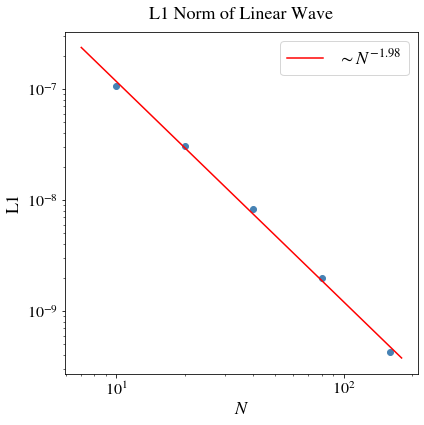

In [14]:
l1 = np.zeros(5)
resolution = np.array([10, 20, 40, 80, 160])
for i, res in enumerate(resolution):

    file_name = "linear_wave_" + str(res) + "_output/final_output/final_output0000/final_output0000.hdf5"
    reader = phd.Hdf5()
    particles = reader.read(file_name)
    particles.remove_tagged_particles(phd.ParticleTAGS.Ghost)

    for j in range(particles.get_carray_size()):
        l1[i] += np.abs(particles["density"][j] -\
                (1.0 + 1.0e-6*np.sin(2*np.pi*particles["position-x"][j])))

    l1[i] = l1[i]/particles.get_carray_size()

lr = LinearRegression()
lr.fit(np.log10(resolution.reshape(-1,1)), np.log10(l1))

x = np.log10(np.linspace(7, 180).reshape(-1,1))
y = lr.predict(x)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_title("L1 Norm of Linear Wave", fontsize=18, y=1.02)

ax.loglog(resolution, l1, "o", color="steelblue")
ax.loglog(10**x.flatten(), 10**y, "r", label=r"$\sim N^{%0.2f}$"%lr.coef_[0])
ax.set_xlabel(r"$N$", fontsize=18)
ax.set_ylabel("L1", fontsize=18)
ax.legend(fontsize=18)

fig.tight_layout()
plt.savefig("linear-wave-l1.png")
plt.show()

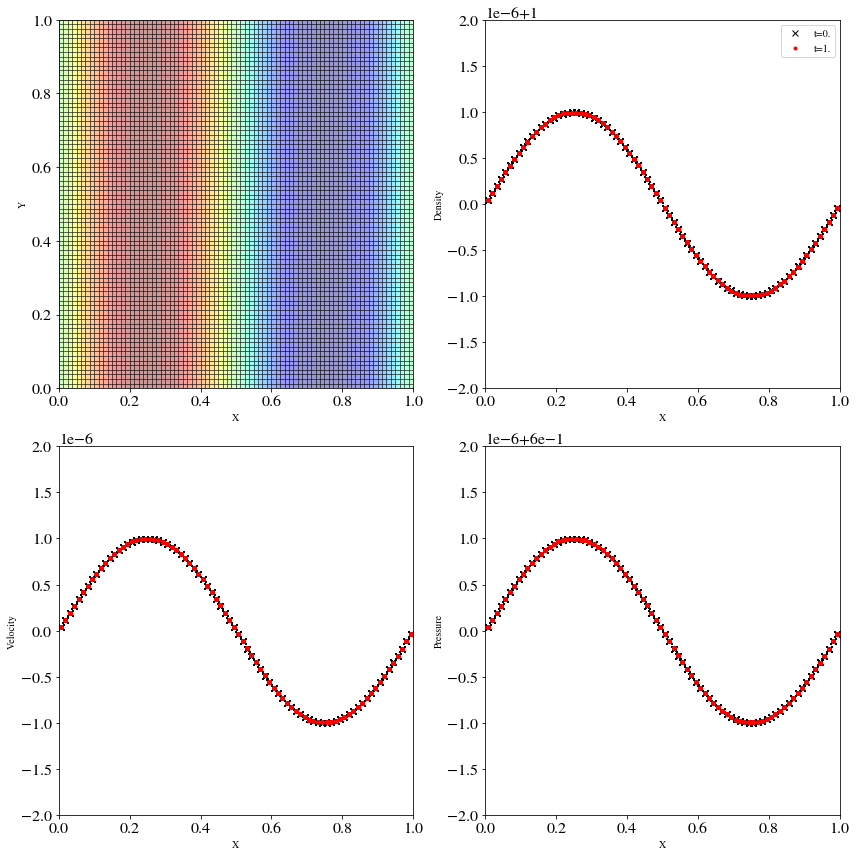

In [13]:
# single-core solution
file_name1="linear_wave_80_output/initial_output/initial_output0000/initial_output0000.hdf5"
file_name2="linear_wave_80_output/final_output/final_output0000/final_output0000.hdf5"
reader = phd.Hdf5()
particles1 = reader.read(file_name1)
particles2 = reader.read(file_name2)

fig, axes = plt.subplots(2,2, figsize=(12,12))

patch, colors = phd.vor_collection(particles1, "density")
particles1.remove_tagged_particles(phd.ParticleTAGS.Ghost)
particles2.remove_tagged_particles(phd.ParticleTAGS.Ghost)

p = PatchCollection(patch, cmap="jet", edgecolor="black", alpha=0.4)
p.set_array(np.array(colors))
ax = axes[0,0]
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.add_collection(p)

ax = axes[0,1]
ax.plot(particles1["position-x"], particles1["density"], "kx", label="t=0.")
ax.plot(particles2["position-x"], particles2["density"], "r.", label="t=1.")
ax.set_xlim(0,1.0)
ax.set_ylim(1.0-2.0e-6,1.0+2.0e-6)
ax.set_xlabel("X")
ax.set_ylabel("Density")
ax.legend()

ax = axes[1,0]
ax.plot(particles1["position-x"], particles1["velocity-x"], "kx", label="t=0.")
ax.plot(particles2["position-x"], particles2["velocity-x"], "r.", label="t=1.")
ax.set_xlim(0,1)
ax.set_ylim(-2.0e-6,+2.0e-6)
ax.set_xlabel("X")
ax.set_ylabel("Velocity")

ax = axes[1,1]
ax.plot(particles1["position-x"], particles1["pressure"], "kx", label="t=0")
ax.plot(particles2["position-x"], particles2["pressure"], "r.", label="t=1")
ax.set_xlim(0,1)
ax.set_ylim(3./5.-2.0e-6,3.0/5.+2.0e-6)
ax.set_xlabel("X")
ax.set_ylabel("Pressure")

plt.tight_layout()
plt.savefig("linear_wave_plot.png")
plt.show()